# Miniproject: Data Exploration


# 1. Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Import database

In [2]:
terrorData = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1', low_memory=False)

# 3. Select data

The [Global Terrorism Database](https://www.kaggle.com/START-UMD/gtd) (`globalterrorismdb_0718dist.csv`) has 135 clomuns. Chose the ones that interest you and (optinally) rename them for better readability.

In [3]:
terrorData=terrorData[['iyear','country_txt','region_txt','nkill','success']]
terrorData.rename(columns={'iyear':'Year', 'country_txt':'Country','region_txt':'Region','nkill':'Killed','success':'Success'},inplace=True)

terrorData.head(10)

Year             Country                       Region  Killed  Success
0  1970  Dominican Republic  Central America & Caribbean     1.0        1
1  1970              Mexico                North America     0.0        1
2  1970         Philippines               Southeast Asia     1.0        1
3  1970              Greece               Western Europe     NaN        1
4  1970               Japan                    East Asia     NaN        1
5  1970       United States                North America     0.0        1
6  1970             Uruguay                South America     0.0        0
7  1970       United States                North America     0.0        1
8  1970       United States                North America     0.0        1
9  1970       United States                North America     0.0        1

# 4. Use data 
Use the modified database to analyze and visualize data. Examples below:

## 4.1. Number of terrorist activities by year (1970-2017)

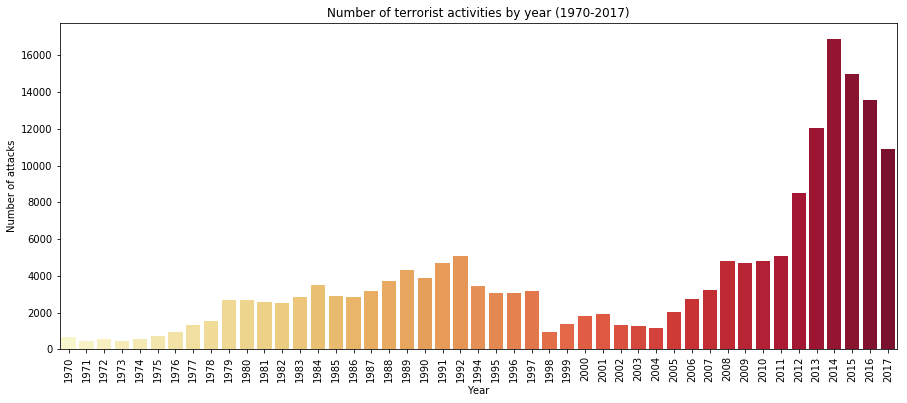

In [4]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terrorData,palette='YlOrRd')
plt.xticks(rotation=90)
plt.title('Number of terrorist activities by year (1970-2017)')
plt.ylabel('Number of attacks')
plt.show()

## 4.2. Highest terrorist activity by country (top 10)

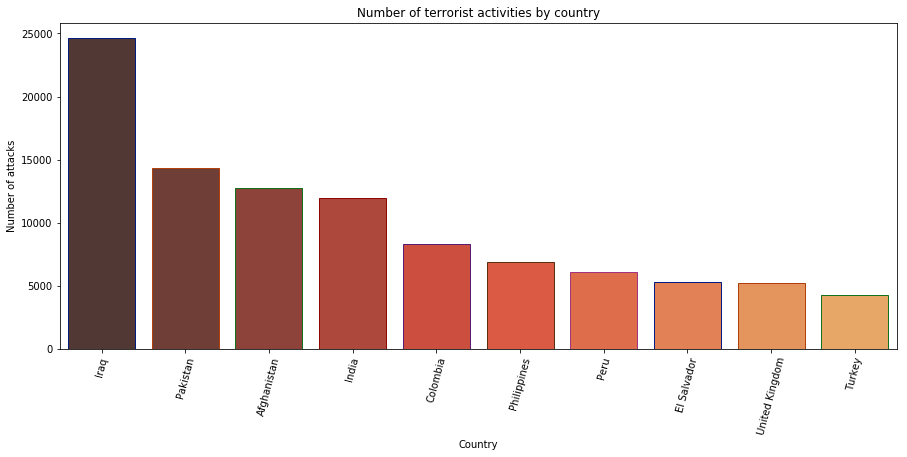

In [5]:
plt.subplots(figsize=(15,6))
sns.countplot('Country',data=terrorData,palette='YlOrRd_d',edgecolor=sns.color_palette('dark',7),order=terrorData['Country'].value_counts().iloc[:10].index)
plt.xticks(rotation=75)
plt.title('Number of terrorist activities by country')
plt.ylabel('Number of attacks')
plt.show()

## 4.3. Change in terrorist activities over years by region

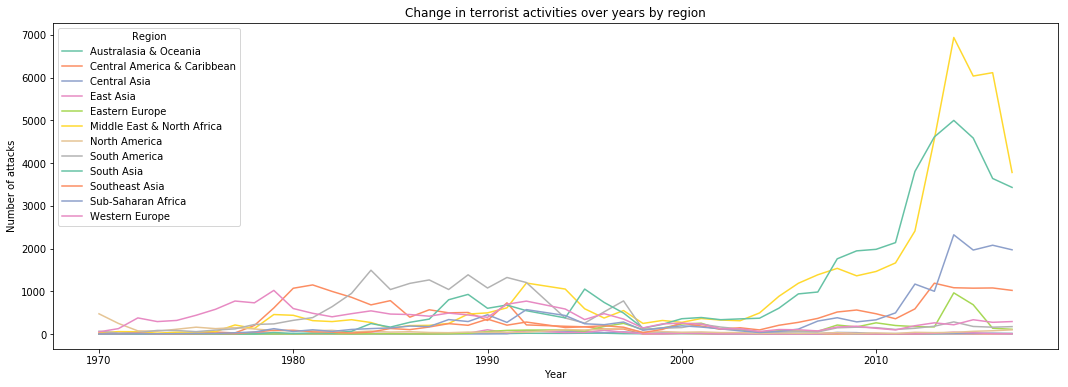

In [6]:
terror_region=pd.crosstab(terrorData.Year,terrorData.Region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Change in terrorist activities over years by region')
plt.ylabel('Number of attacks')
plt.show()

## 4.4. Comparison of successful and unsuccessful attacks by region
(Where `1` stands for successful attack and `0` stands for unsuccessful attack)

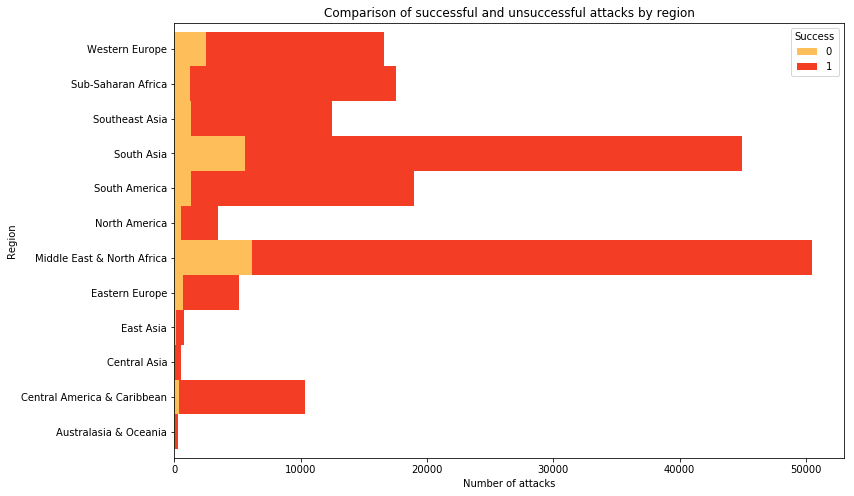

In [7]:
pd.crosstab(terrorData.Region,terrorData.Success).plot.barh(stacked=True,width=1,color=sns.color_palette('YlOrRd',2))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.title('Comparison of successful and unsuccessful attacks by region')
plt.xlabel('Number of attacks')
plt.ylabel('Region')
plt.show()

## 4.5. Highest total confirmed fatalities by country (top 10)

In [8]:
terror_world = terrorData[['Country','Killed']]
terror_world = terror_world.groupby(['Country'])['Killed'].sum().sort_values(ascending=False).reset_index()
terror_world.head(10)

Country   Killed
0         Iraq  78589.0
1  Afghanistan  39384.0
2     Pakistan  23822.0
3      Nigeria  22682.0
4        India  19341.0
5    Sri Lanka  15530.0
6        Syria  15229.0
7     Colombia  14698.0
8         Peru  12771.0
9  El Salvador  12053.0